설문지 응답자의 기본 정보 및 비식별 응답을 기반으로 '정치 성향' 예측하기
===
이규봉
===

### 본 프로젝트에서는 ideo_self, 즉 응답자가 생각하는 자신의 정치 성향을 0부터 10까지 순서를 가진 클래스로 설정하였습니다. 이러한 반응 변수를 분류 예측하는 선형판별분석(Linear Discriminanat Analysis)을 중점으로 진행합니다.

In [19]:
setwd('C:/Users/User/Desktop/마이닝/exam')

In [20]:
dev.off()
rm(list = ls())

null device 
          1

In [21]:
library(xlsx)
data0 = read.xlsx('data1.xlsx', 1, header = T, startRow = 2)

--------------------------

데이터를 불러와 변수들을 numeric화 합니다. 반응변수인 ideo_self는 factor로 변경 합니다.

In [22]:
for (i in 1:ncol(data0)) {
  data0[,i] <- as.character(data0[,i])
  data0[,i] <- as.numeric(data0[,i])
}
data0$ideo_self <- as.factor(data0$ideo_self)

Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강제형변환에 의해 생성된 NA 입니다"Warning message in eval(expr, envir, enclos):
"강

--------------------------

응답자의 신상정보에 관한 변수들 간 상관관계를 파악해봅니다. 모든 변수들의 상관 관계를 파악한 결과, age, age1, birth 세개의 연령과 연관된 변수들의 강한 상관관계가 포착됩니다. 

In [23]:
cor(data0$age, data0$age1, use = 'pairwise.complete.obs')
cor(data0$birth, data0$age, use = 'pairwise.complete.obs')

[1] 0.9733275

[1] -0.9733275

--------------------------

높은 해석력을 얻고 과적합을 방지하기 위해, 연령대를 구간화한 age 변수만을 사용합니다. 또한 분석에 필요없는 열(NA, id)을 삭제합니다.

In [24]:
data0<-data0[,3:ncol(data0)]
colnames(data0)
data0<-data0[,-2]
data0<-data0[,-2]
colnames(data0)

[1] "sex"       "birth"     "age1"      "age"       "area"      "edu"      
 [7] "income"    "k2"        "k3"        "k4"        "k6"        "k7"       
[13] "k8"        "k10"       "k12"       "k13"       "k14"       "ideo_self"

[1] "sex"       "age"       "area"      "edu"       "income"    "k2"       
 [7] "k3"        "k4"        "k6"        "k7"        "k8"        "k10"      
[13] "k12"       "k13"       "k14"       "ideo_self"

--------------------------

변수 k3에 -1을 적용합니다.

In [25]:
data0[,7] <- data0[,7] - 1

--------------------------

585행의 데이터는 모든 변수가 결측치입니다. 삭제합니다.

In [26]:
data0 <- data0[-585,]

--------------------------

이번에는 k 질문항목 변수들 간 상관성을 파악합니다. 카이제곱 검정을 통해, 두 변수 사이의 연관성이 없는지 p 값으로 확인해봅니다. 모든 k 변수들을 1:1로 카이제곱 검정 해본 결과, k14변수가 k7, 8, 13 변수와 독립이 아닌 것으로 나타났습니다. 이에 k14 변수를 분석에 사용하지 않습니다.

In [27]:
chisq.test(data0$k7, data0$k14)
chisq.test(data0$k8, data0$k14)
chisq.test(data0$k13, data0$k14)

data0 <- data0[, -15]


	Pearson's Chi-squared test with Yates' continuity correction

data:  data0$k7 and data0$k14
X-squared = 0.010859, df = 1, p-value = 0.917



	Pearson's Chi-squared test with Yates' continuity correction

data:  data0$k8 and data0$k14
X-squared = 2.444, df = 1, p-value = 0.118



	Pearson's Chi-squared test with Yates' continuity correction

data:  data0$k13 and data0$k14
X-squared = 0.20083, df = 1, p-value = 0.6541


In [28]:
colnames(data0)

[1] "sex"       "age"       "area"      "edu"       "income"    "k2"       
 [7] "k3"        "k4"        "k6"        "k7"        "k8"        "k10"      
[13] "k12"       "k13"       "ideo_self"

------------------------------------------------------

이제 데이터 내 결측치들을 대체합니다. 결측치를 해결하고자 Amelia 패키지를 이용합니다. Amelia 패키지는 multiple imputation을 수행하는 패키지로써, Bootstrapping과 Expectation-Maximization algorithm을 통해 'k 문항에 대한 응답들의 결측치'를 대치합니다. training set으로 적합한 모델을 복수의 validation sets에 적용하며 CV 작업을 수행해 검정력을 산출하고자 이 접근법을 채택했습니다.

In [29]:
library(Amelia)
set.seed(1234)
imputed.k <- amelia(x=data0[,1:14], m = 5, ords = c('k2', 'k3', 'k4', 'k6', 'k7', 'k8', 'k10', 'k12', 'k13'))

-- Imputation 1 --

  1  2  3  4  5  6  7  8  9

-- Imputation 2 --

  1  2  3  4  5  6  7  8

-- Imputation 3 --

  1  2  3  4  5  6  7  8

-- Imputation 4 --

  1  2  3  4  5  6  7  8

-- Imputation 5 --

  1  2  3  4  5  6  7  8  9



--------------------------

amelia() 결과 5개의 데이터 셋이 어떻게 imputation 되었는지 그래프로 살펴봅니다. 빨간색 선이 각 변수들의 결측치가 어떻게 대체되었는지 나타내고 있습니다.

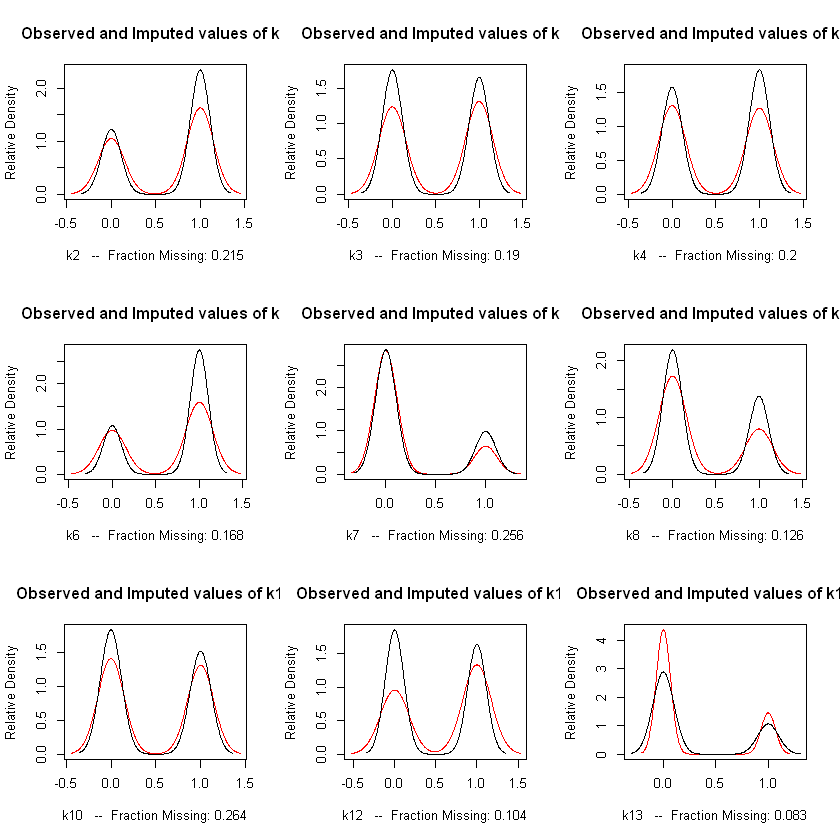

In [30]:
par(mfrow = c(3, 3))
plot(imputed.k)

--------------------------

imputaion 과정을 거친 5개의 데이터 셋을 파일로 저장하고, 다시 로딩합니다.
결과물에 새로 들어간 index 열을 삭제 합니다. 그리고 원본 ideo_self 열을 각 데이터셋에 합치는 작업을 수행합니다.

In [31]:
write.amelia(imputed.k, separate = T, 'imputed', extension = NULL, format = 'csv')

imp1 <- read.table('imputed1', header = T, sep = ',', na.strings = 'NA', dec = '.', strip.white = T)
imp2 <- read.table('imputed2', header = T, sep = ',', na.strings = 'NA', dec = '.', strip.white = T)
imp3 <- read.table('imputed3', header = T, sep = ',', na.strings = 'NA', dec = '.', strip.white = T)
imp4 <- read.table('imputed4', header = T, sep = ',', na.strings = 'NA', dec = '.', strip.white = T)
imp5 <- read.table('imputed5', header = T, sep = ',', na.strings = 'NA', dec = '.', strip.white = T)

#deletion imps' index col and adding ideo_self
imp1 <- imp1[, 2:ncol(imp1)]
imp1$ideo_self <- data0$ideo_self

imp2 <- imp2[, 2:ncol(imp2)]
imp2$ideo_self <- data0$ideo_self

imp3 <- imp3[, 2:ncol(imp3)]
imp3$ideo_self <- data0$ideo_self

imp4 <- imp4[, 2:ncol(imp4)]
imp4$ideo_self <- data0$ideo_self

imp5 <- imp5[, 2:ncol(imp5)]
imp5$ideo_self <- data0$ideo_self

--------------------------

'imp1'부터 'imp5'까지, 결측치 값을 Amelia 함수로 대체한 데이터 셋을 training set, validation set, test set으로 나눕니다. training set과 validation set은 반응변수 결과를 알고 있는 899행까지의 데이터를 6:4의 비율로 랜덤하게 나눕니다.

In [32]:
n = nrow(imp1[1:899,])
set.seed(1234)
trainIndex = sample(1:n, size = round(0.6*n), replace=FALSE)
tr.set = imp1[1:899,][trainIndex ,]
val.set = imp1[1:899,][-trainIndex ,]

tr.set2 = imp2[1:899,][trainIndex ,]
val.set2 = imp2[1:899,][-trainIndex ,]

tr.set3 = imp3[1:899,][trainIndex ,]
val.set3 = imp3[1:899,][-trainIndex ,]

tr.set4 = imp4[1:899,][trainIndex ,]
val.set4 = imp4[1:899,][-trainIndex ,]

tr.set5 = imp5[1:899,][trainIndex ,]
val.set5 = imp5[1:899,][-trainIndex ,]

test.set <- imp1[900:nrow(data0),]
test.set2 <- imp2[900:nrow(data0),]
test.set3 <- imp3[900:nrow(data0),]
test.set4 <- imp4[900:nrow(data0),]
test.set5 <- imp5[900:nrow(data0),]

--------------------------

이제 선형판별 분석을 각각의 데이터셋으로 수행합니다. 5개 각각의 데이터셋으로 적합된 모델로 1개의 validation set(val.set)을 예측 후 정확도를 측정합니다.

In [33]:
library(MASS)
set.seed(1234)
lda.fit <- lda(ideo_self ~., data = tr.set)
lda.fit2 <- lda(ideo_self ~., data = tr.set2)
lda.fit3 <- lda(ideo_self ~., data = tr.set3)
lda.fit4 <- lda(ideo_self ~., data = tr.set4)
lda.fit5 <- lda(ideo_self ~., data = tr.set5)

lda.pred <- predict(lda.fit, newdata = val.set)
lda.pred2 <- predict(lda.fit2, newdata = val.set)
lda.pred3 <- predict(lda.fit3, newdata = val.set)
lda.pred4 <- predict(lda.fit4, newdata = val.set)
lda.pred5 <- predict(lda.fit5, newdata = val.set)

In [34]:
mean(lda.pred$class == val.set$ideo_self)
mean(lda.pred2$class == val.set$ideo_self)
mean(lda.pred3$class == val.set$ideo_self)
mean(lda.pred4$class == val.set$ideo_self)
mean(lda.pred5$class == val.set5$ideo_self)

mean(lda.pred$class != val.set$ideo_self)
mean(lda.pred2$class != val.set$ideo_self)
mean(lda.pred3$class != val.set$ideo_self)
mean(lda.pred4$class != val.set$ideo_self)
mean(lda.pred5$class != val.set5$ideo_self)

[1] 0.2777778

[1] 0.2972222

[1] 0.2888889

[1] 0.2944444

[1] 0.2861111

[1] 0.7222222

[1] 0.7027778

[1] 0.7111111

[1] 0.7055556

[1] 0.7138889

In [35]:
table(pred = lda.pred2$class, obs = val.set$ideo_self)
#table(pred = lda.pred2$class, obs = val.set$ideo_self)
#table(pred = lda.pred3$class, obs = val.set$ideo_self)
#table(pred = lda.pred4$class, obs = val.set$ideo_self)
#table(pred = lda.pred5$class, obs = val.set$ideo_self)

    obs
pred  0  1  2  3  4  5  6  7  8  9 10
  0   0  0  1  0  0  1  0  0  0  0  0
  1   1  1  0  1  1  1  0  0  0  0  0
  2   0  0  1  0  0  1  0  0  0  0  0
  3   3  0  6  8  8 14  1  0  3  0  0
  4   1  1  0  2  1  4  0  0  1  0  3
  5   5  4  8 20 21 69 17 12  3  0  8
  6   2  0  0  2  2  6  3  2  1  0  0
  7   0  1  1  0  1  7  8  5  3  0  1
  8   0  0  0  1  4  9 12 11 15  4  5
  9   0  0  0  1  0  2  1  0  1  0  0
  10  0  0  0  2  1  4  1  3  2  0  4

In [36]:
summary(lda.pred2$class)

0   1   2   3   4   5   6   7   8   9  10 
  2   5   2  43  13 167  18  27  61   5  17

### 5개의 데이터셋에서 적합된 각 모델들 중, 가장 높은 예측 정확도(약 29.7%)를 보인 'lda.fit2'를 첫번째 예측 모형 모델 후보로 지정합니다.

--------------------------

이번엔 유의한 변수 subset을 선별해보고자, regsubset() 함수를 통한 Best Subset selection을 시행해보았습니다.
선택 기준을 adjusted R^2 값으로 진행해본 결과, sex, k2, k3, k4, k6, k8, k12, k13 가 유의한 변수로 선정되었습니다.

[1] 8

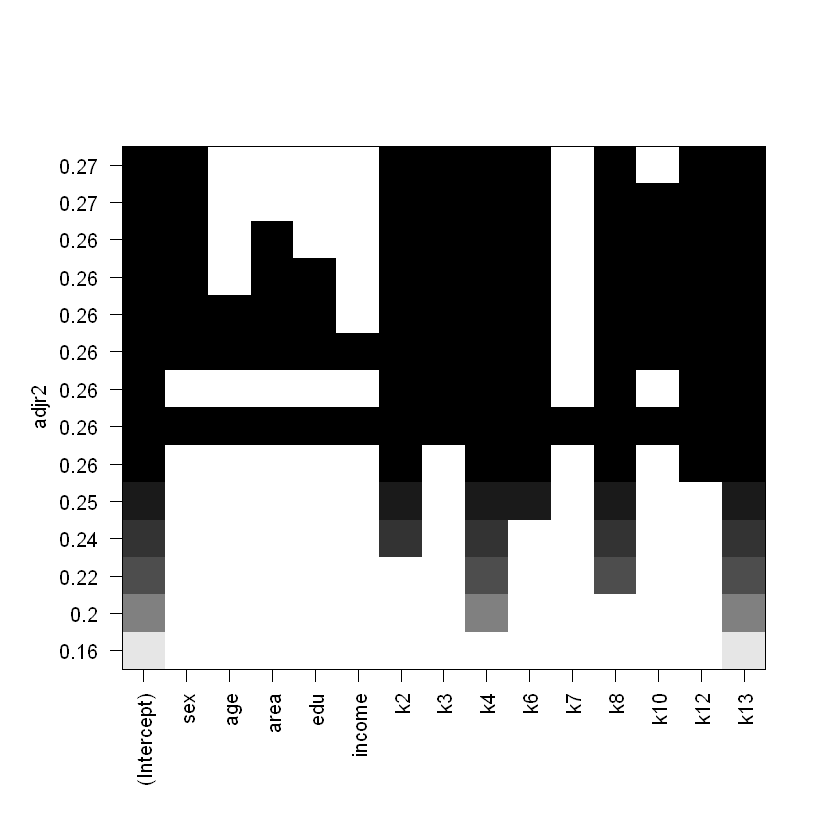

In [37]:
library(leaps)
regfit.full=regsubsets(imp1$ideo_self~.,imp1,nvmax=15)
reg.summary<-summary(regfit.full)
which.max(reg.summary$adjr2)
plot(regfit.full,scale = 'adjr2')

-----------------------------

위에서 선택된 변수들로 LDA를 시행해봅니다. 첫번째 후보 모델과의 비교를 위해 같은 tr.set, val.set으로 적합 및 검정을 진행합니다. 
검정결과, 예측 정확도는 첫번째 후보 모델보다 미미하게 향상되었지만, 중심부(5)에 과적합된 예측 결과가 포착됩니다.

In [38]:
lda.fit.subsets <- lda(ideo_self ~ sex + k2 + k3 + k4 + k6 + k8 + k12 + k13, data = tr.set)
lda.pred.subsets <- predict(lda.fit.subsets, newdata = val.set)
mean(lda.pred.subsets$class == val.set$ideo_self)
table(pred = lda.pred.subsets$class, obs = val.set$ideo_self)
summary(lda.pred.subsets$class)

[1] 0.3027778

    obs
pred  0  1  2  3  4  5  6  7  8  9 10
  0   0  0  0  0  0  0  0  0  0  0  0
  1   0  0  0  0  0  0  0  0  0  0  0
  2   0  0  1  2  0  1  0  0  0  0  0
  3   3  1  6  9  8 12  1  0  2  0  0
  4   1  0  0  1  2  1  2  0  0  0  0
  5   6  5  9 20 23 76 18 12  5  0  8
  6   2  0  0  2  1  9  2  3  1  0  0
  7   0  1  1  2  2  7  7  6  5  0  5
  8   0  0  0  0  2  6 12 10 12  3  7
  9   0  0  0  0  0  0  0  0  0  0  0
  10  0  0  0  1  1  6  1  2  4  1  1

0   1   2   3   4   5   6   7   8   9  10 
  0   0   4  42   7 182  20  36  52   0  17

--------------------------

이어 랜덤 포레스트 기법으로 동일한 변수 subset과 tr.set, val.set 분석을 진행했습니다.
역시 예측 정확도는 향상되었으나, 중심부(5)에 지나치게 집중된 예측 결과가 포착됩니다.

In [39]:
library(randomForest)
set.seed(1234)
rf.fit <- randomForest(ideo_self ~sex + k2 + k3 + k4 + k6 + k8 + k12 + k13, data= tr.set)
rf.pred = predict(rf.fit, newdata= val.set)
mean(rf.pred== val.set$ideo_self)
table(pred = rf.pred, obs = val.set$ideo_self)
summary(rf.pred)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


[1] 0.3222222

    obs
pred  0  1  2  3  4  5  6  7  8  9 10
  0   0  0  0  0  0  0  0  0  0  0  0
  1   0  0  0  0  0  0  0  0  0  0  0
  2   0  1  0  0  0  0  0  0  0  0  0
  3   1  0  0  2  0  4  1  1  1  0  0
  4   3  0  2  2  4  1  1  0  1  0  0
  5   7  6 14 32 32 93 25 15 11  0 13
  6   1  0  0  0  0  2  2  3  0  0  1
  7   0  0  1  1  1  9  5  3  4  0  1
  8   0  0  0  0  2  9  9 11 12  4  6
  9   0  0  0  0  0  0  0  0  0  0  0
  10  0  0  0  0  0  0  0  0  0  0  0

0   1   2   3   4   5   6   7   8   9  10 
  0   0   1  10  14 248   9  25  53   0   0

--------------------------------------

지금까지 Amelia 패키지를 통해 만든 결측치를 대체한 데이터 셋(5개 중 imp1)을 바탕으로,
1. 선형판별분석, 2. Best subset selection 절차 후의 선형판별 분석, 3. Best subset selection 절차 후의 랜덤포래스트를 진행했습니다.

#### 모형은 각각
#### 1. lda(ideo_self ~ sex +age + area + edu + income + k2 + k3 + k4 + k6 + k7 + k8 + k10 + k12 + k13)
#### 2. lda(ideo_self ~ sex + k2 + k3 + k4 + k6 + k8 + k12 + k13)
#### 3. randomForest(ideo_self ~sex + k2 + k3 + k4 + k6 + k8 + k12 + k13)
#### 으로 나타낼 수 있습니다.

validation set으로 검정 시, 1번 모델에 비해 2, 3번의 예측 정확도가 높았습니다. 하지만 중심부(5)에 과적합된 예측 결과가 포착되어, 민감도를 고려해 1번 모델 lda(ideo_self ~ sex +age + area + edu + income + k2 + k3 + k4 + k6 + k7 + k8 + k10 + k12 + k13) 을 이용, ideo_self의 예측을 시행합니다.

In [40]:
answer.n3 <- predict(lda.fit2, newdata = test.set)
test.set$ideo_self <- answer.n3$class
summary(answer.n3$class)

0  1  2  3  4  5  6  7  8  9 10 
 0  2  3 20  4 80  6 11 16  2 11

In [41]:
final_prediction <- as.data.frame(answer.n3$class)

ideo_self 응답이 결측치인 155명에 대한 최종 예측, final_prediction 입니다.
---

In [44]:
final_prediction

answer.n3$class
8
8
5
8
5
10
8
3
5
8


In [45]:
write.csv(final_prediction, file = 'prediction_Q3.csv')